<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">PROJECT: HR ANALYTICS</span>


<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">BATCH NUMBER : DS2309</span>

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">NAME: ABHISHEK AGNIHOTRI</span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LOADING DATASET</span>

In [2]:
df=pd.read_csv('HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.columns    

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING NULL VALUES</span>

In [6]:
df.isnull().value_counts()

Age    Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
False  False      False           False      False       False             False      False           False          False           False                    False   False       False           False     False    False            False          False          False        False               False   False     False              False              False                     False          False             False              False                  F

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DATASET INFO</span>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">UNIQUE VALUES IN DATASET</span>

In [9]:
df['Attrition'].nunique()

2

In [10]:
df['Department'].nunique()

3

In [17]:
for i in df.columns[:34]:
    unique_value=df[i].nunique()
    #print( unique_value)
    print(f"Column: {i}, Unique Values: {unique_value}")
    
    

Column: Age, Unique Values: 43
Column: Attrition, Unique Values: 2
Column: BusinessTravel, Unique Values: 3
Column: DailyRate, Unique Values: 886
Column: Department, Unique Values: 3
Column: DistanceFromHome, Unique Values: 29
Column: Education, Unique Values: 5
Column: EducationField, Unique Values: 6
Column: EmployeeCount, Unique Values: 1
Column: EmployeeNumber, Unique Values: 1470
Column: EnvironmentSatisfaction, Unique Values: 4
Column: Gender, Unique Values: 2
Column: HourlyRate, Unique Values: 71
Column: JobInvolvement, Unique Values: 4
Column: JobLevel, Unique Values: 5
Column: JobRole, Unique Values: 9
Column: JobSatisfaction, Unique Values: 4
Column: MaritalStatus, Unique Values: 3
Column: MonthlyIncome, Unique Values: 1349
Column: MonthlyRate, Unique Values: 1427
Column: NumCompaniesWorked, Unique Values: 10
Column: Over18, Unique Values: 1
Column: OverTime, Unique Values: 2
Column: PercentSalaryHike, Unique Values: 15
Column: PerformanceRating, Unique Values: 2
Column: Rela

In [18]:
for i in df.columns[:34]:
    unique_value=df[i].nunique()
    unique_name=df[i].unique
    #print( unique_value)
    print(f"Column: {i}, Unique Values: {unique_value}, Unique_name:{unique_name}")

Column: Age, Unique Values: 43, Unique_name:<bound method Series.unique of 0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64>
Column: Attrition, Unique Values: 2, Unique_name:<bound method Series.unique of 0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object>
Column: BusinessTravel, Unique Values: 3, Unique_name:<bound method Series.unique of 0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: object>
Column: DailyRate, Unique Values: 886, Unique_name:<bound method Series.unique of 0  

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION COUNTPLOT: TARGET VS INPUTS DATASET</span>

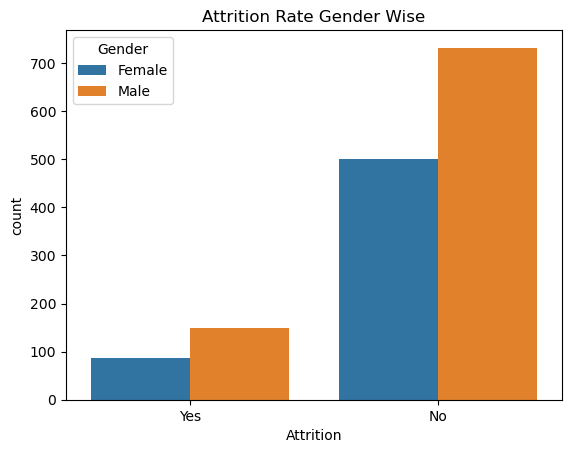

In [21]:
sns.countplot(x='Attrition', hue='Gender', data=df)
plt.title('Attrition Rate Gender Wise')
plt.show()

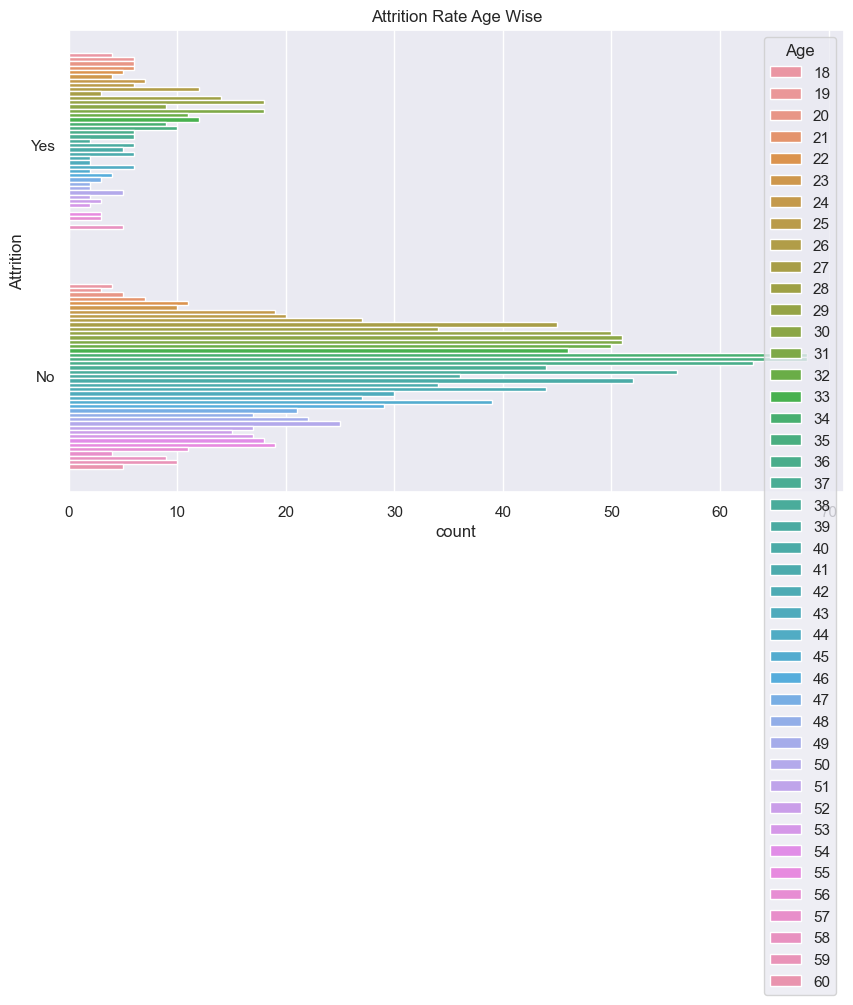

In [35]:
sns.countplot(y='Attrition', hue='Age', data=df)
plt.yticks(rotation=0)  
plt.title('Attrition Rate Age Wise')
plt.show()


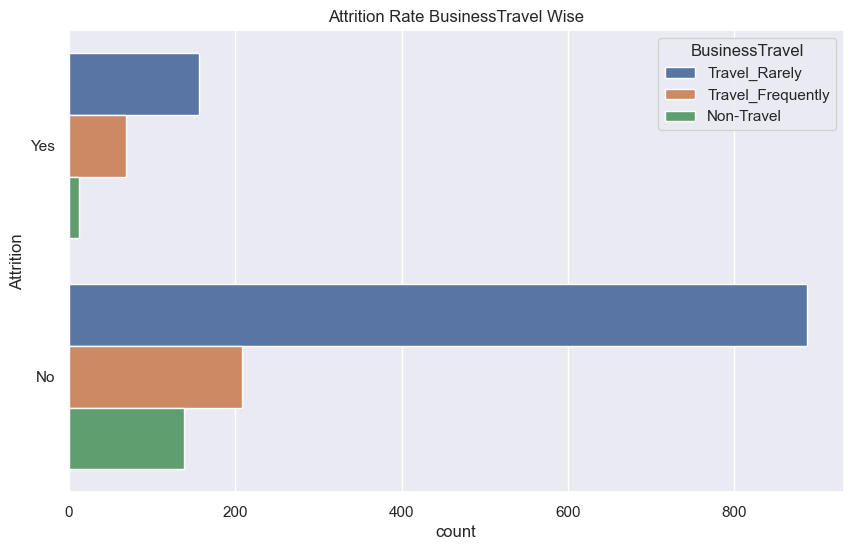

In [37]:
sns.countplot(y='Attrition', hue='BusinessTravel', data=df)
plt.yticks(rotation=0)  
plt.title('Attrition Rate BusinessTravel Wise')
plt.show()


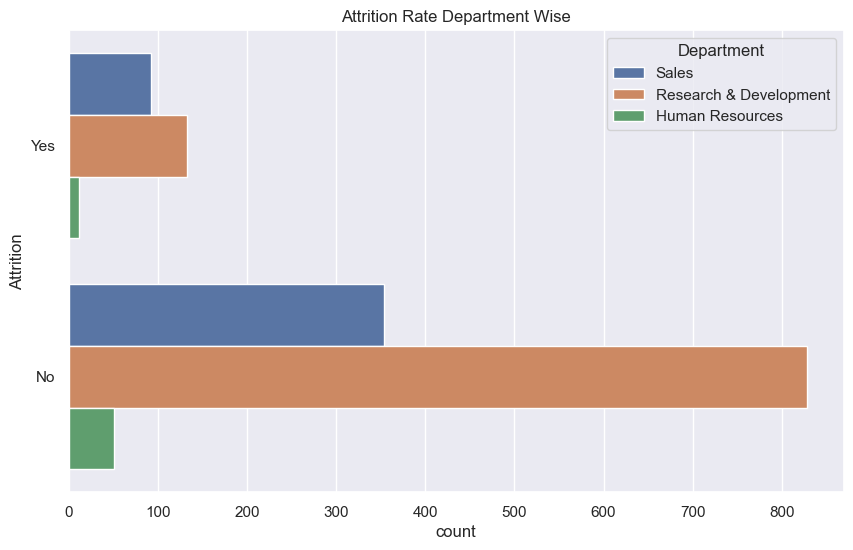

In [38]:
sns.countplot(y='Attrition', hue='Department', data=df)
plt.yticks(rotation=0)  
plt.title('Attrition Rate Department Wise')
plt.show()

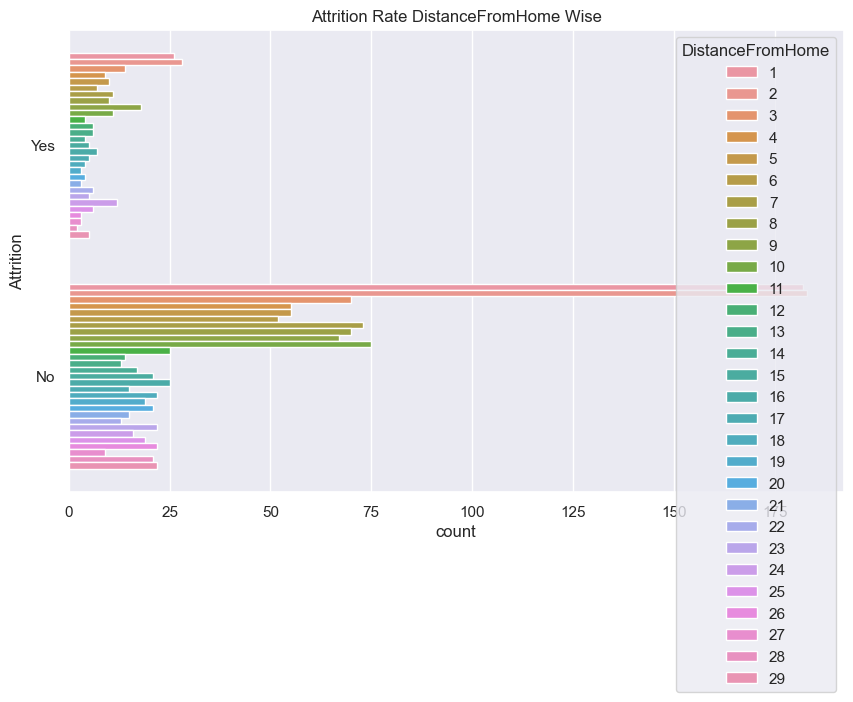

In [39]:
sns.countplot(y='Attrition', hue='DistanceFromHome', data=df)
plt.yticks(rotation=0)
plt.title('Attrition  DistanceFromHome Wise')
plt.show()

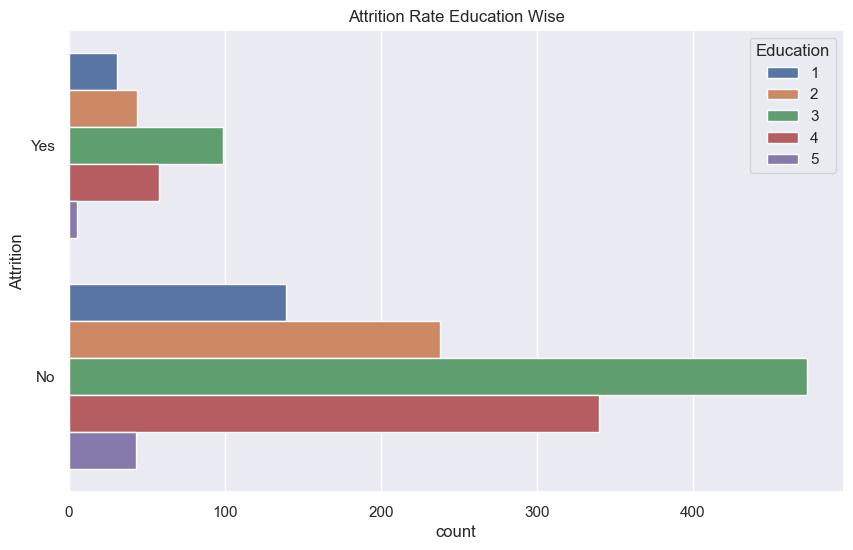

In [40]:
sns.countplot(y='Attrition', hue='Education', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition Education Wise')
plt.show()

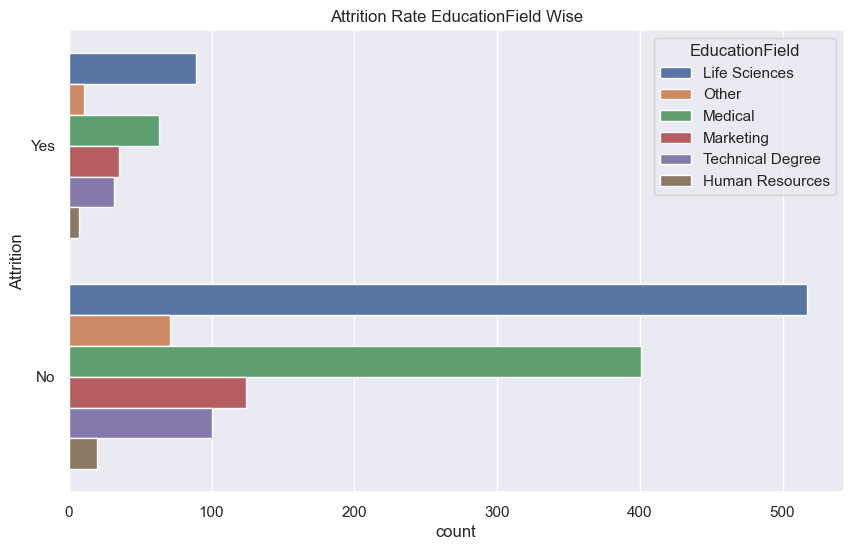

In [41]:
sns.countplot(y='Attrition', hue='EducationField', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition Education Field Wise')
plt.show()

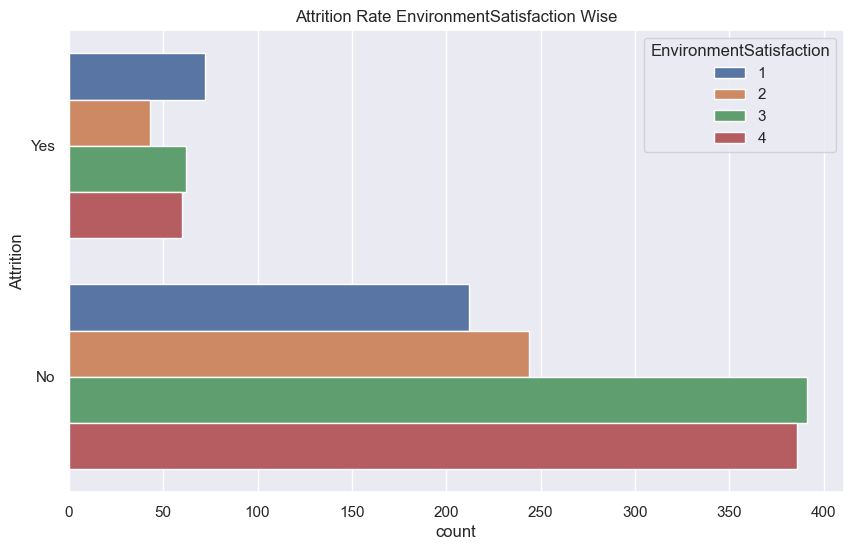

In [42]:
sns.countplot(y='Attrition', hue='EnvironmentSatisfaction', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  Environment Satisfaction Wise')
plt.show()

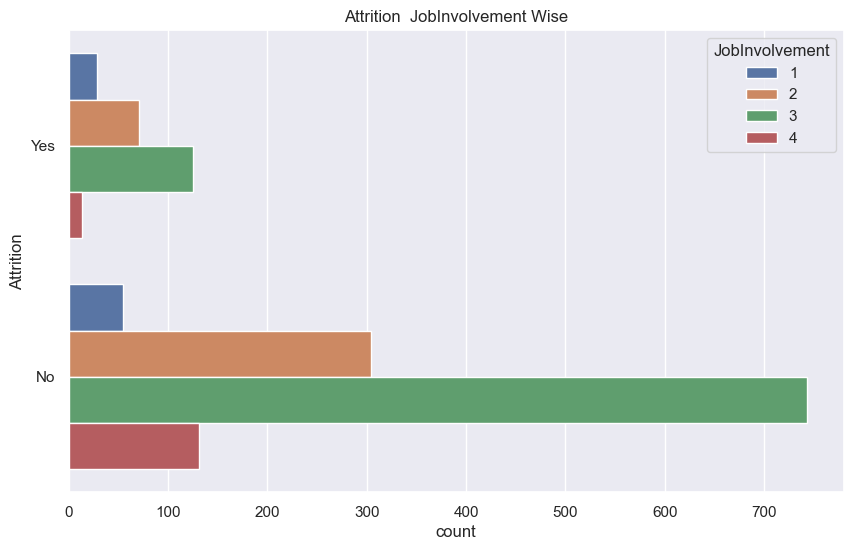

In [43]:
sns.countplot(y='Attrition', hue='JobInvolvement', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  Job-Involvement Wise')
plt.show()


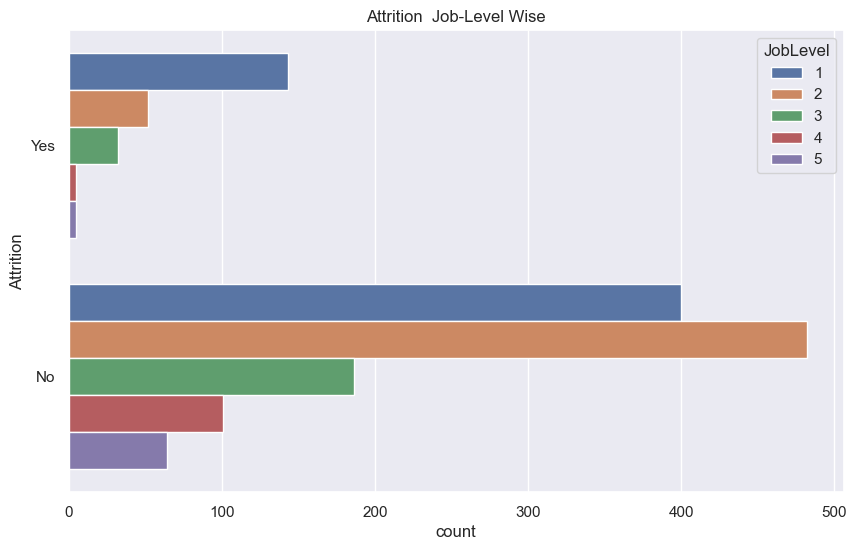

In [44]:
sns.countplot(y='Attrition', hue='JobLevel', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  Job-Level Wise')
plt.show()

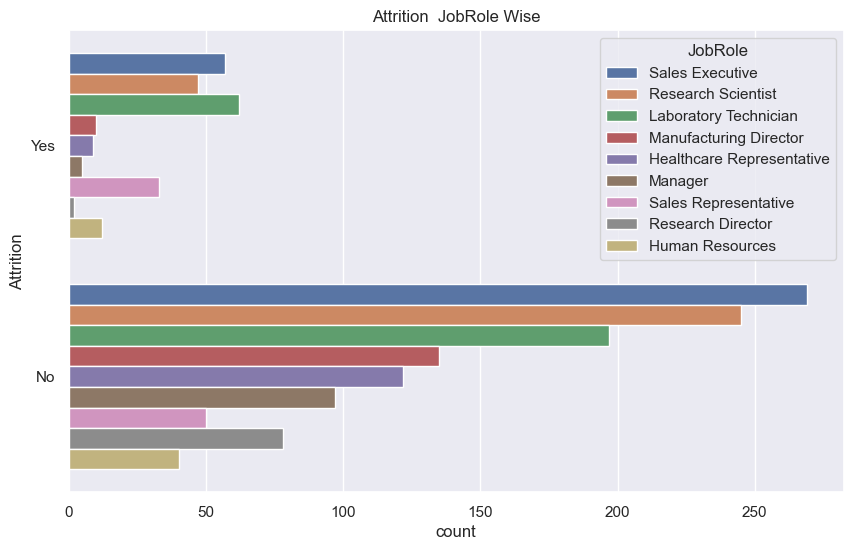

In [45]:
sns.countplot(y='Attrition', hue='JobRole', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  JobRole Wise')
plt.show()

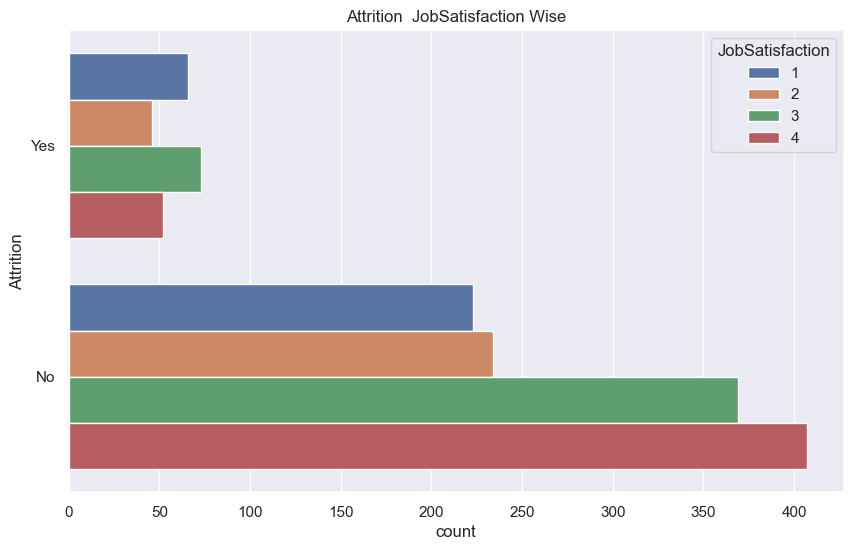

In [47]:
sns.countplot(y='Attrition', hue='JobSatisfaction', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  JobSatisfaction Wise')
plt.show()

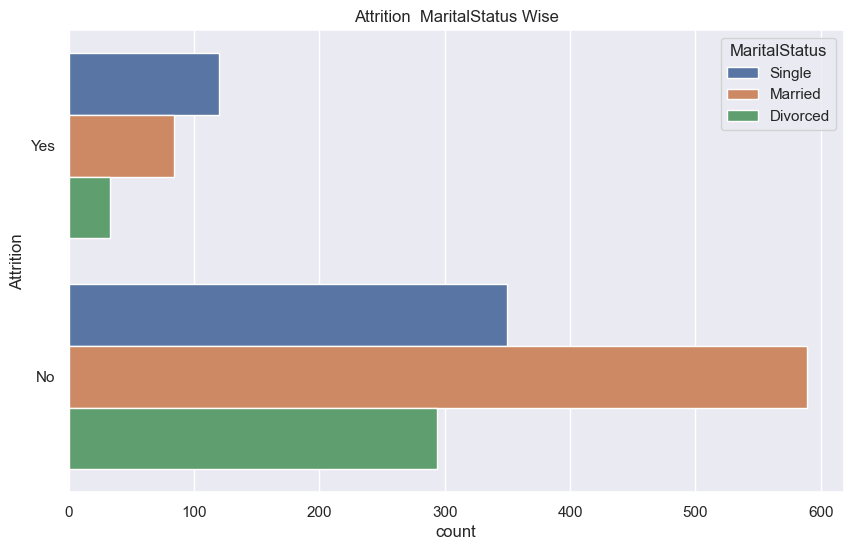

In [49]:
sns.countplot(y='Attrition', hue='MaritalStatus', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  MaritalStatus Wise')
plt.show()

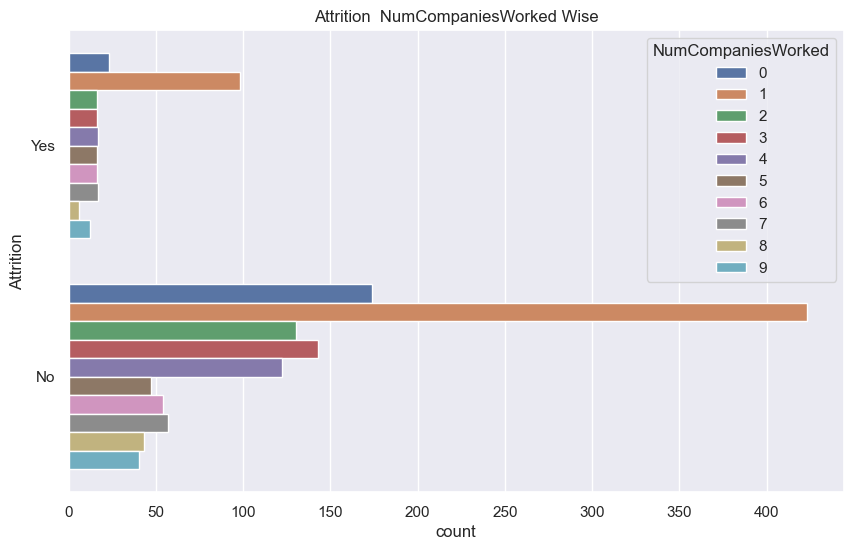

In [51]:
sns.countplot(y='Attrition', hue='NumCompaniesWorked', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  NumCompaniesWorked Wise')
plt.show()

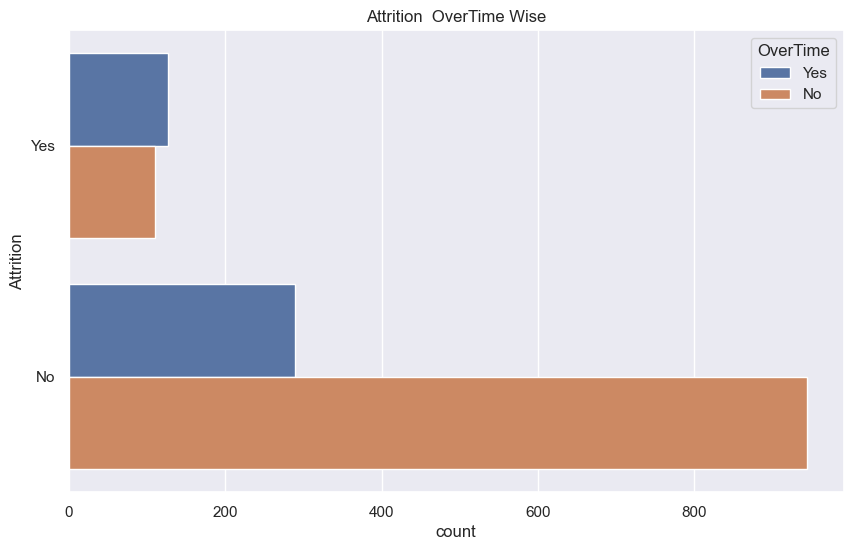

In [52]:
sns.countplot(y='Attrition', hue='OverTime', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  OverTime Wise')
plt.show()

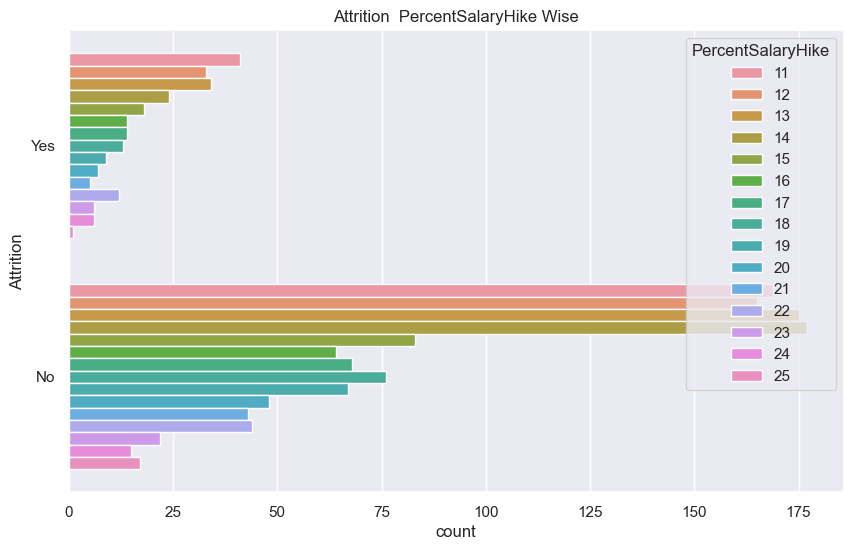

In [53]:
sns.countplot(y='Attrition', hue='PercentSalaryHike', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  PercentSalaryHike Wise')
plt.show()

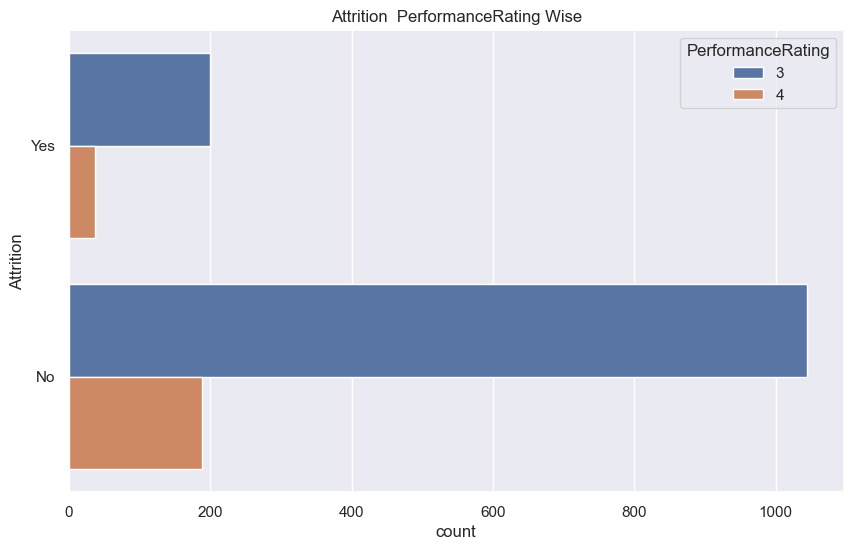

In [54]:
sns.countplot(y='Attrition', hue='PerformanceRating', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  PerformanceRating Wise')
plt.show()

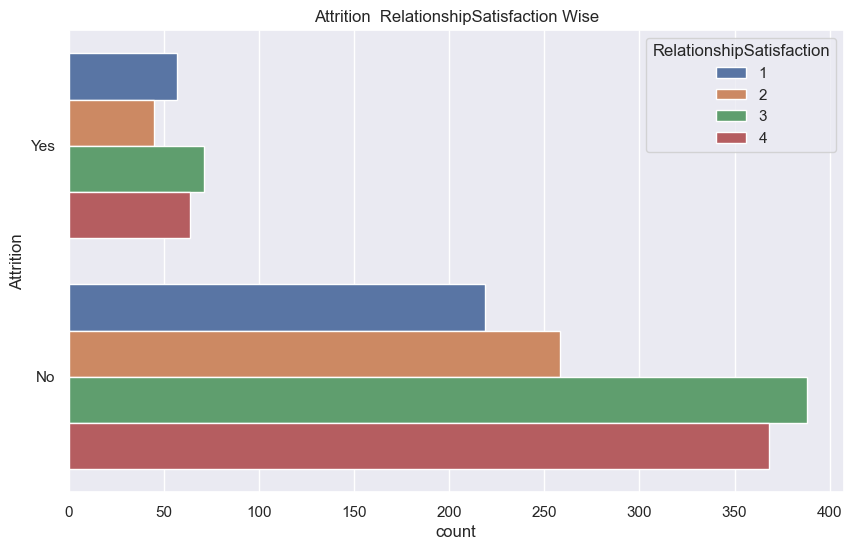

In [55]:
sns.countplot(y='Attrition', hue='RelationshipSatisfaction', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  RelationshipSatisfaction Wise')
plt.show()


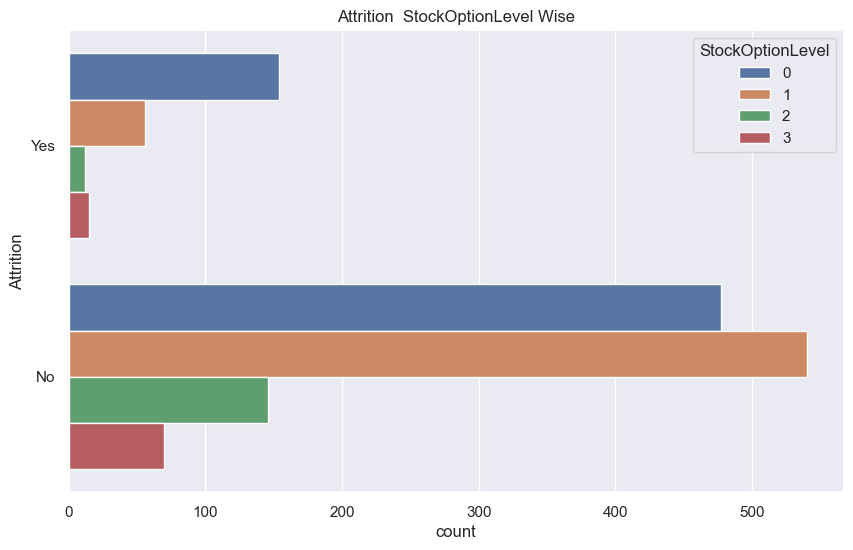

In [56]:
sns.countplot(y='Attrition', hue='StockOptionLevel', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  StockOptionLevel Wise')
plt.show()

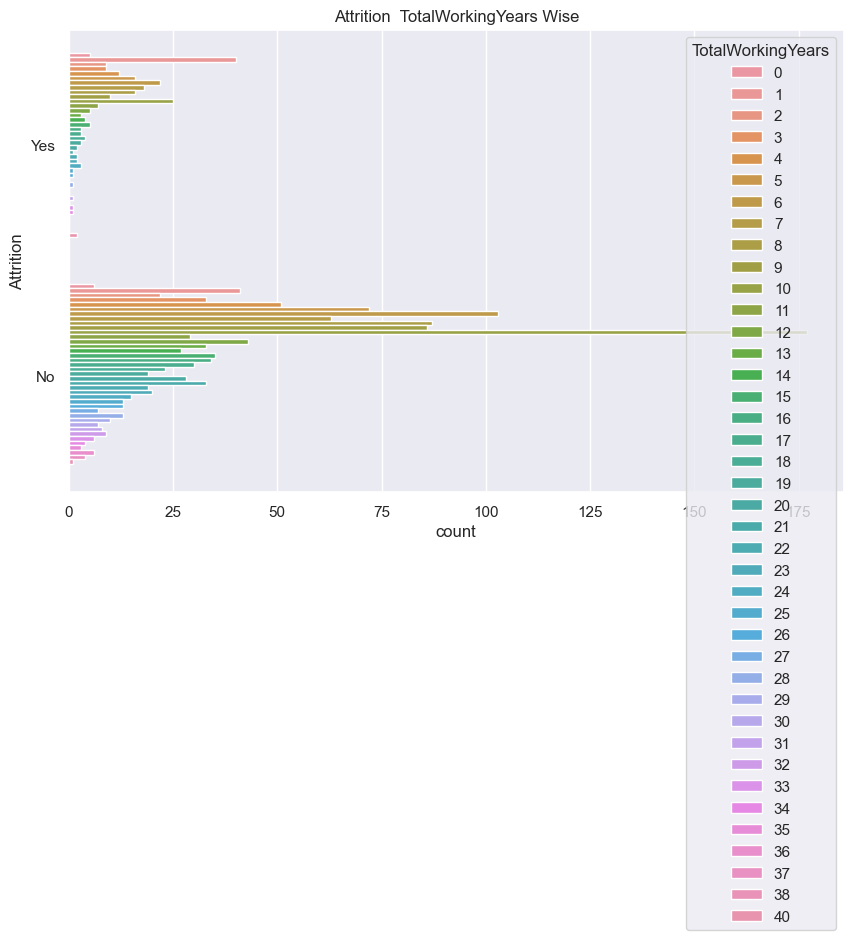

In [57]:
sns.countplot(y='Attrition', hue='TotalWorkingYears', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  TotalWorkingYears Wise')
plt.show()

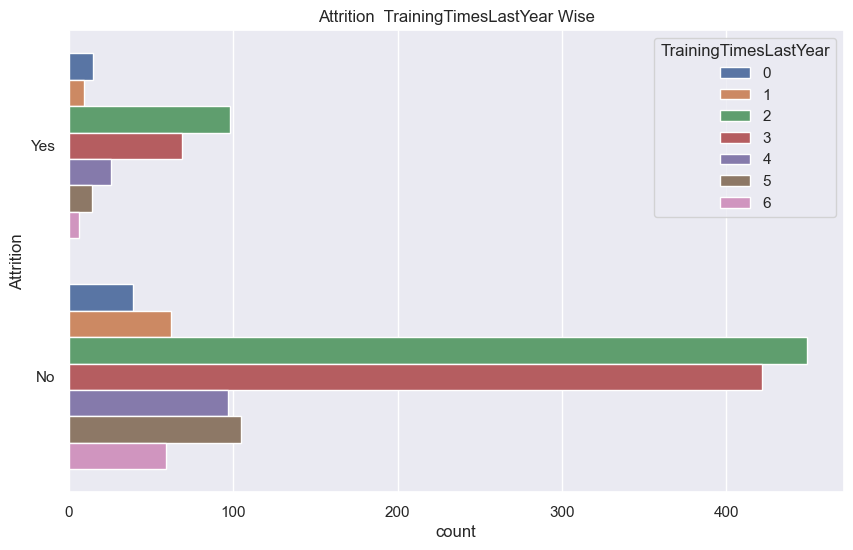

In [58]:
sns.countplot(y='Attrition', hue='TrainingTimesLastYear', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  TrainingTimesLastYear Wise')
plt.show()

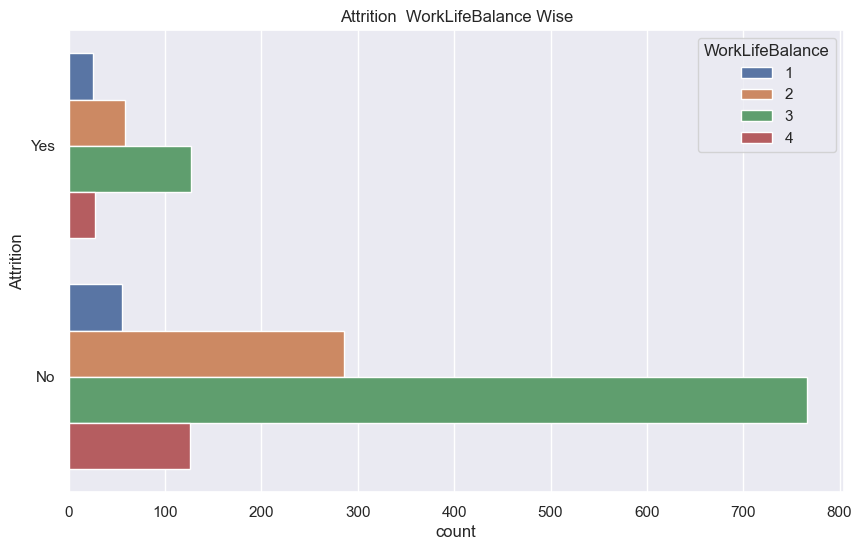

In [59]:
sns.countplot(y='Attrition', hue='WorkLifeBalance', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  WorkLifeBalance Wise')
plt.show()


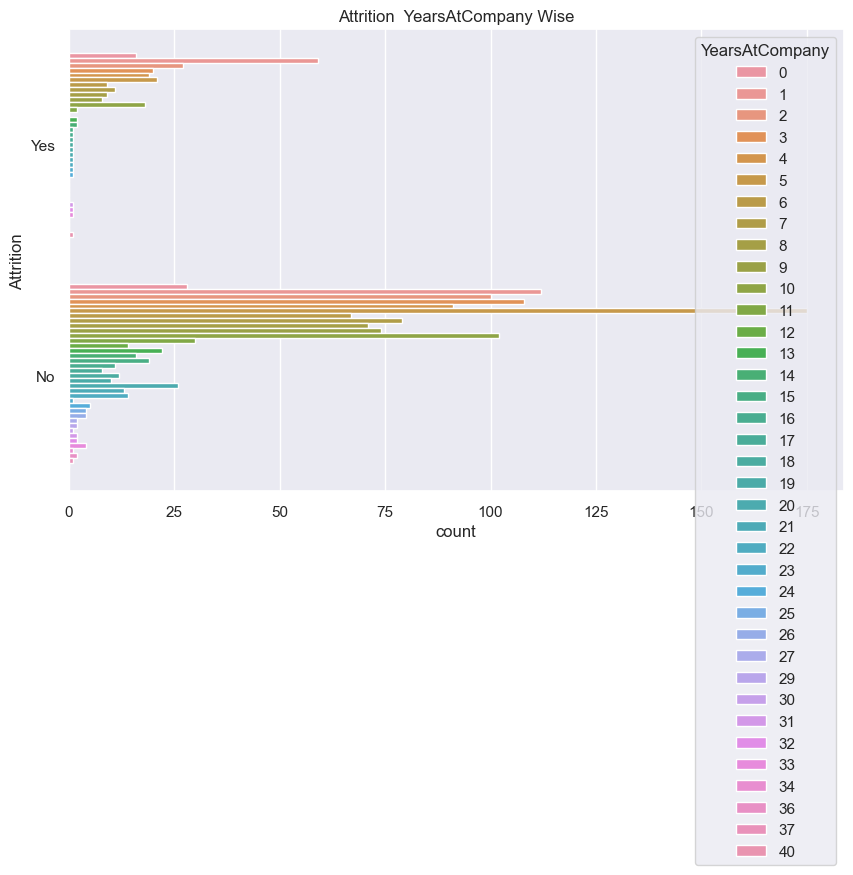

In [60]:
sns.countplot(y='Attrition', hue='YearsAtCompany', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  YearsAtCompany Wise')
plt.show()


Maximum Attrition observe after 1 year of experience in company

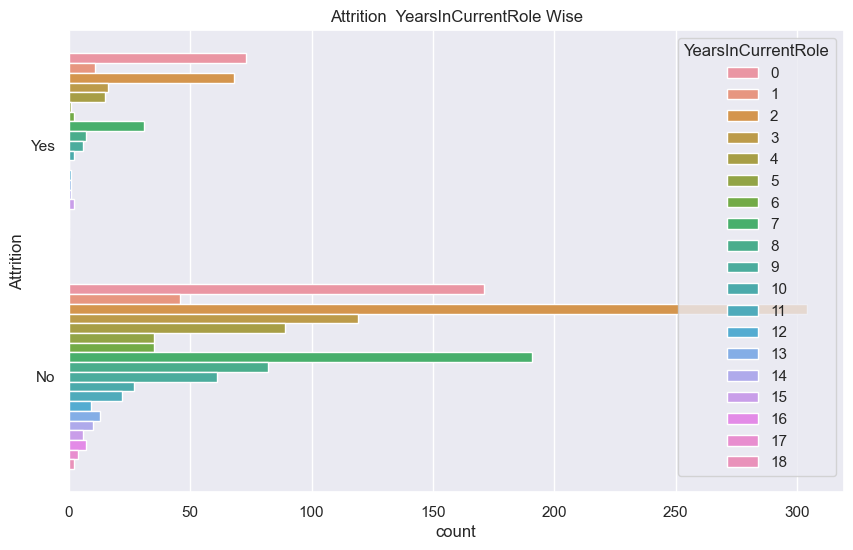

In [61]:
sns.countplot(y='Attrition', hue='YearsInCurrentRole', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  YearsInCurrentRole Wise')
plt.show()



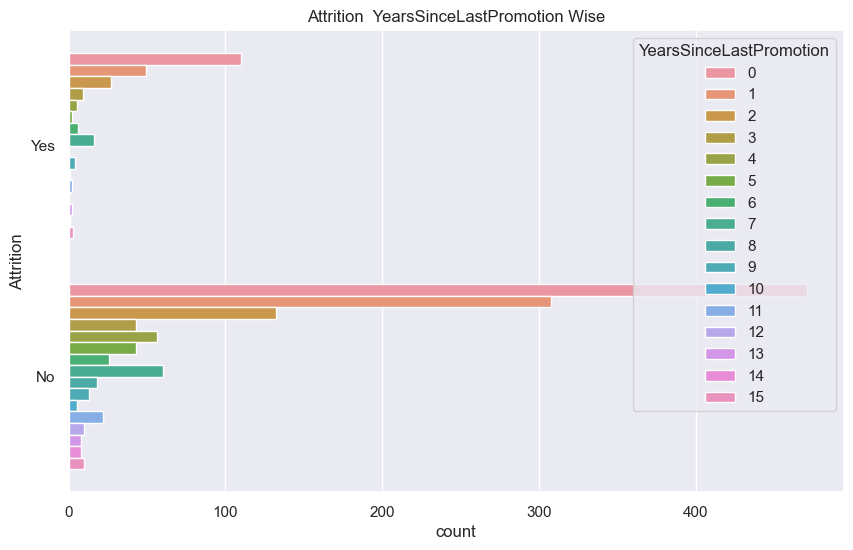

In [62]:
sns.countplot(y='Attrition', hue='YearsSinceLastPromotion', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  YearsSinceLastPromotion Wise')
plt.show()

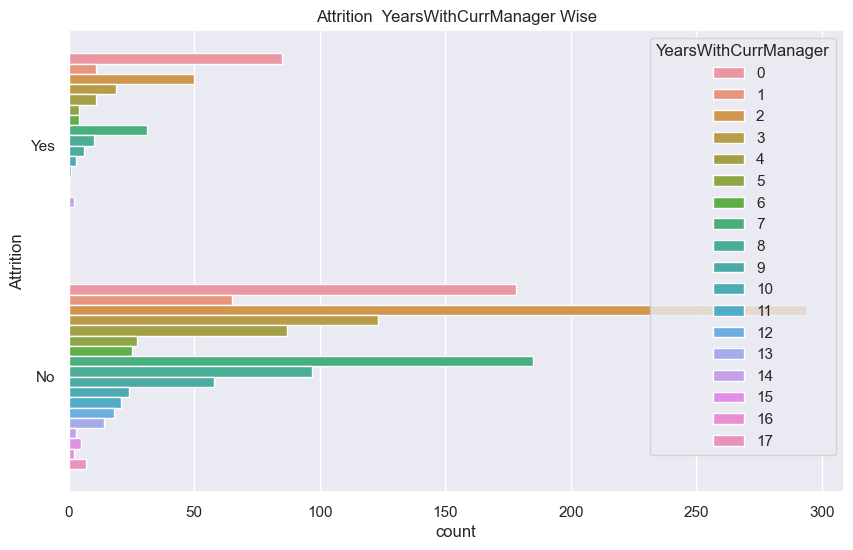

In [70]:

sns.countplot(y='Attrition', hue='YearsWithCurrManager', data=df)
plt.yticks(rotation=0) 
plt.title('Attrition  YearsWithCurrManager Wise')
plt.show()

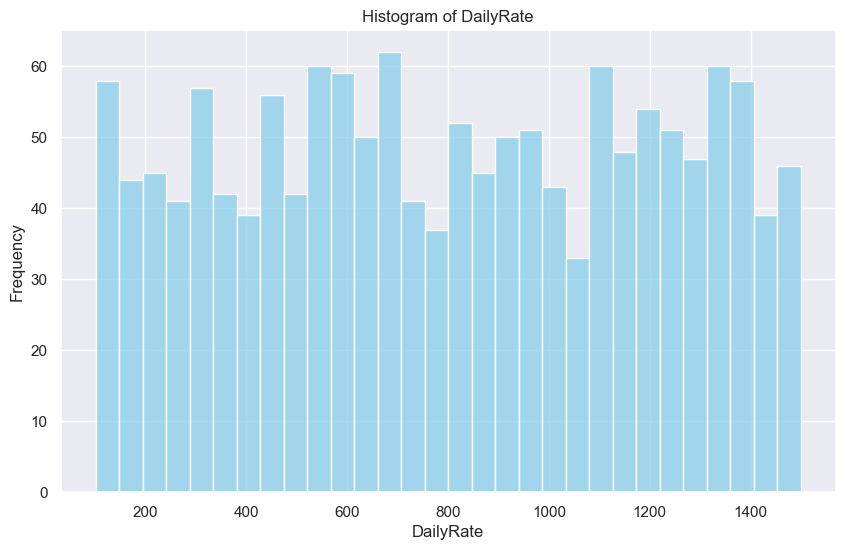

In [29]:
sns.histplot(df['DailyRate'], bins=30, kde=False, color='skyblue')

plt.xlabel('DailyRate')
plt.ylabel('Frequency')
plt.title('Histogram of DailyRate')

plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION: CORRELATION HEATMAP</span>

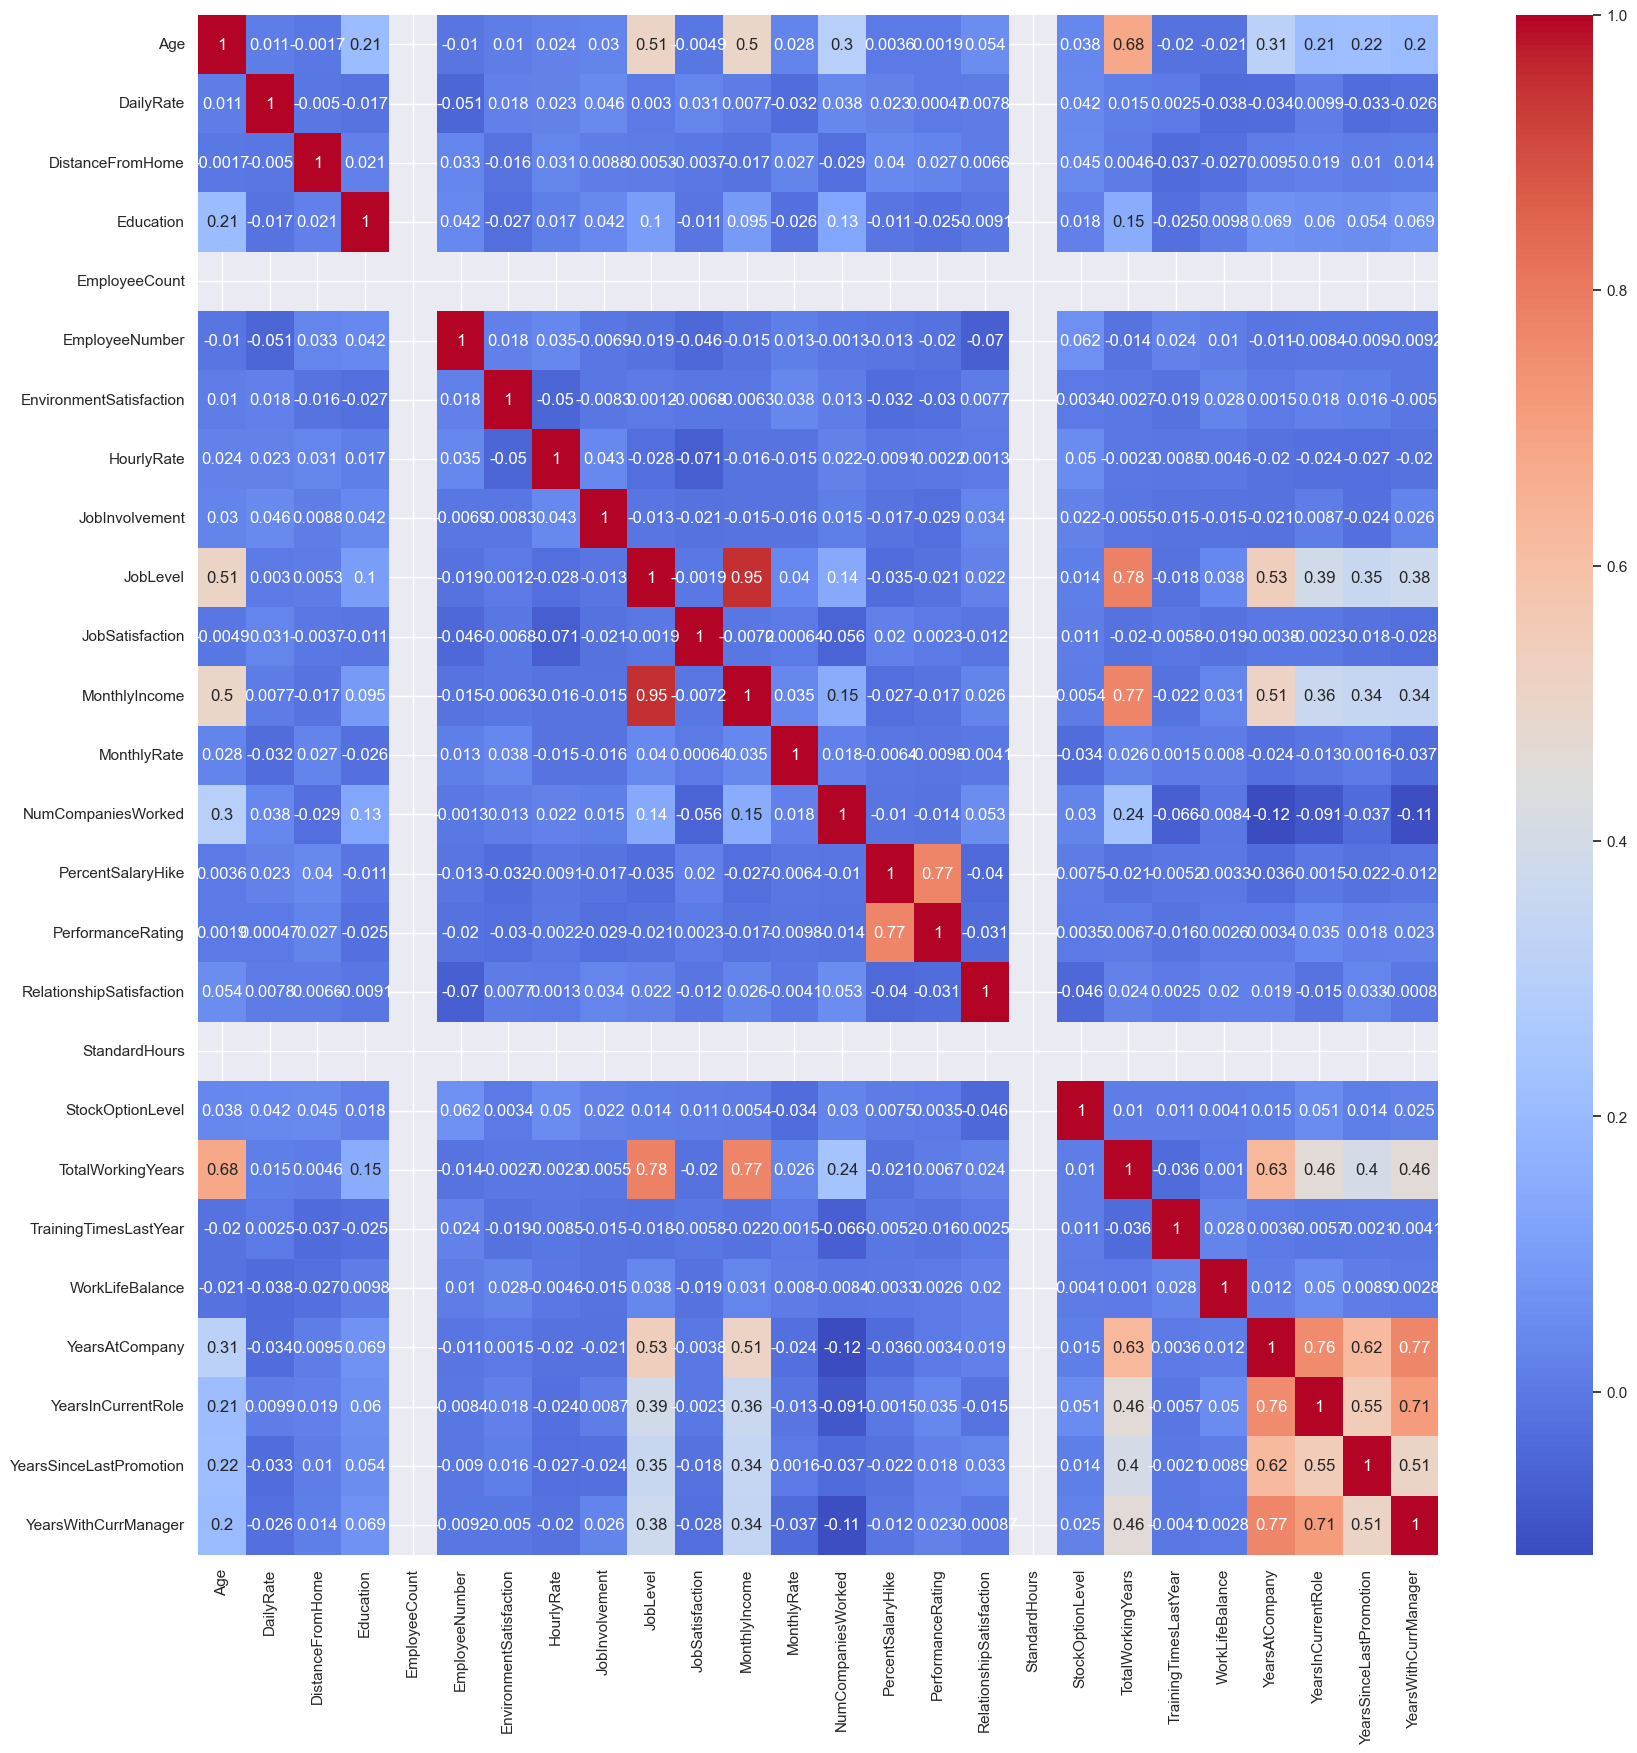

In [66]:
plt.figure(figsize=(20,20), facecolor='white')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [67]:
pd.set_option('display.max_columns', None)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [68]:
df1=df.copy()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DROPIING OF UNNECESSARY COLUMNS FROM DATASET</span>

In [121]:
# Assuming df1 is your DataFrame
column_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df1.drop(column_to_drop, axis=1, inplace=True)

# Display the modified DataFrame
df1


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [122]:
df.shape

(1470, 35)

In [123]:
df1.shape

(1470, 31)

In [130]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,3,1,41,4,2,2,4,1,2571,12290,4,Y,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,4,1,42,2,3,0,1,1,9991,21457,4,Y,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,Y,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,4,1,63,2,2,7,2,1,5390,13243,2,Y,0,14,3,4,80,0,17,3,2,9,6,0,8


In [125]:
df.shape

(1470, 35)

In [81]:
df1.shape

(1470, 31)

In [82]:
df.isna().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [85]:
df1.max()


Age                                           60
Attrition                                    Yes
BusinessTravel                     Travel_Rarely
DailyRate                                   1499
Department                                 Sales
DistanceFromHome                              29
Education                                      5
EducationField                  Technical Degree
EnvironmentSatisfaction                        4
Gender                                      Male
HourlyRate                                   100
JobInvolvement                                 4
JobLevel                                       5
JobRole                     Sales Representative
JobSatisfaction                                4
MaritalStatus                             Single
MonthlyIncome                              19999
MonthlyRate                                26999
NumCompaniesWorked                             9
OverTime                                     Yes
PercentSalaryHike   

In [86]:
df1.min()


Age                                                18
Attrition                                          No
BusinessTravel                             Non-Travel
DailyRate                                         102
Department                            Human Resources
DistanceFromHome                                    1
Education                                           1
EducationField                        Human Resources
EnvironmentSatisfaction                             1
Gender                                         Female
HourlyRate                                         30
JobInvolvement                                      1
JobLevel                                            1
JobRole                     Healthcare Representative
JobSatisfaction                                     1
MaritalStatus                                Divorced
MonthlyIncome                                    1009
MonthlyRate                                      2094
NumCompaniesWorked          

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LABEL ENCODER IMPLEMENTED IN CATEGORICAL VARIABLE</span> 

In [129]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Specify the columns to encode
columns_to_encode = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus','OverTime']

# Apply LabelEncoder to each specified column in the original DataFrame
df1[columns_to_encode] = df1[columns_to_encode].apply(lambda col: le.fit_transform(col))

# Display the modified DataFrame
df1.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2


In [120]:
df1.shape

(1470, 35)

In [95]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [97]:
df1.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [99]:
df1.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
Y

In [101]:
df1.skew().abs()

Age                         0.413286
Attrition                   1.844366
BusinessTravel              1.439006
DailyRate                   0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                   0.289681
EducationField              0.550371
EnvironmentSatisfaction     0.321654
Gender                      0.408665
HourlyRate                  0.032311
JobInvolvement              0.498419
JobLevel                    1.025401
JobRole                     0.357270
JobSatisfaction             0.329672
MaritalStatus               0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction    0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance             0.552480
YearsAtCompany              1.764529
Y

<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">CORRECTION OF SKEWNESS</span>

In [107]:
print("Number of missing values in each column:")
print(df1.isnull().sum())


Number of missing values in each column:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [113]:
from scipy.stats import boxcox

# Correct skewness using Box-Cox transformation
skewed_columns_mask = np.abs(df1.skew()) > 0.5
skewed_columns = df1.columns[skewed_columns_mask]

# Calculate the constant using a dictionary comprehension
constants = {col: abs(df1[col].min()) + 1 for col in skewed_columns}

# Apply Box-Cox transformation with the correct constant for each column
for col in skewed_columns:
    constant = constants[col]
    df1[col] = df1[col].apply(lambda x: x + constant if x <= 0 else x)
    transformed_col, _ = boxcox(df1[col])
    df1[col] = transformed_col

# Display the DataFrame after correcting skewness
print("\nDataFrame after correcting skewness:")
print(df1)
print("\nSkewness of each column after transformation:")
print(df1.skew())




DataFrame after correcting skewness:
      Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1        7.703398       1102           2          0.000000   
1      49          1        0.000000        279           1          2.422421   
2      37          1        7.703398       1373           1          0.728735   
3      33          1        0.000000       1392           1          1.189800   
4      27          1        7.703398        591           1          0.728735   
...   ...        ...             ...        ...         ...               ...   
1465   36          1        0.000000        884           1          3.958284   
1466   39          1        7.703398        613           1          2.042767   
1467   27          1        7.703398        155           1          1.533561   
1468   49          1        0.000000       1023           2          0.728735   
1469   34          1        7.703398        628           1          2.

<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">Visulaization: Skewness Interpretation</span>

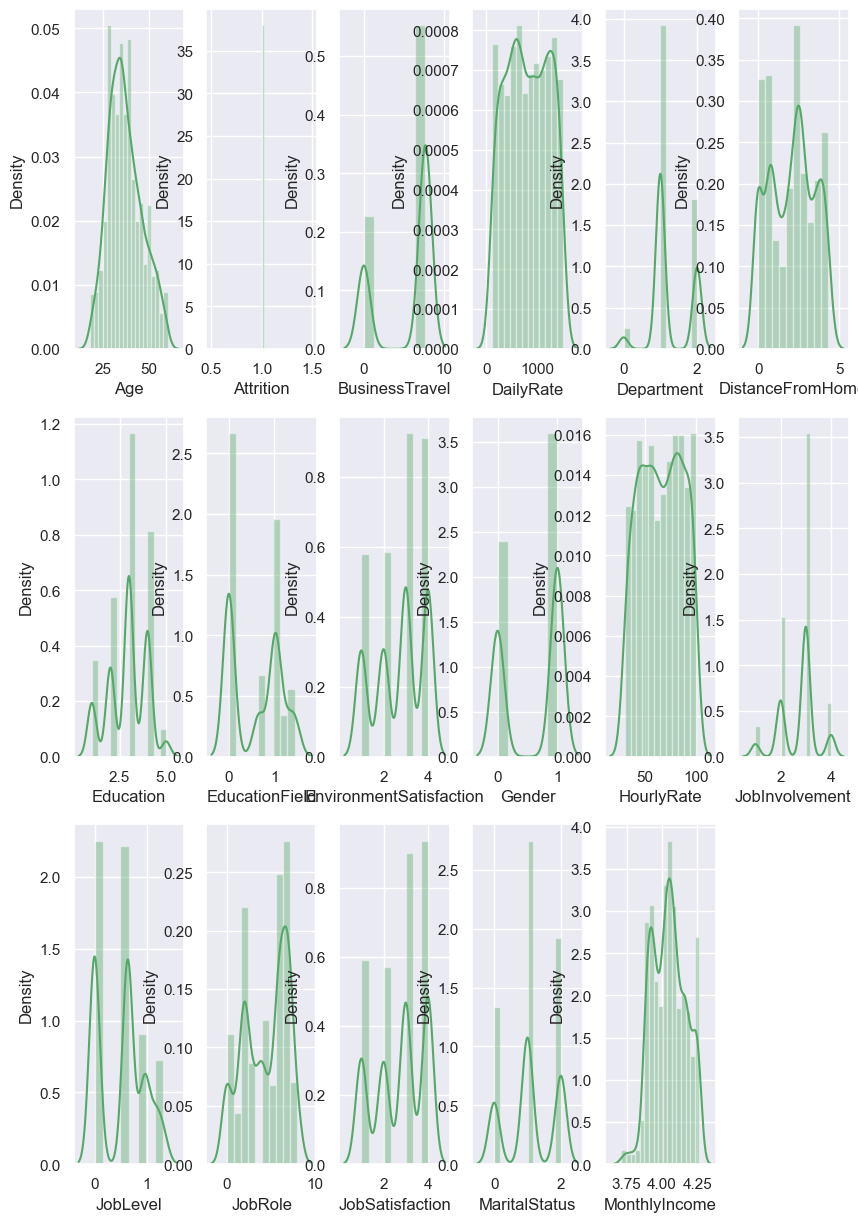

In [114]:
plt.figure(figsize=(10,15), facecolor='white')
pltnum=1
for i in df1.columns:
    if pltnum<18:
        plt.subplot(3,6, pltnum)
        sns.distplot(df1[i], color='g')
        plt.xlabel(i)
    pltnum+=1
plt.show()

<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING AND CORRECTION OF OUTLIERS USING Z-SCORE</span>

In [115]:
from scipy.stats import zscore

z_score=zscore(df1)
z_score

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,NaN,0.639841,0.742527,1.401512,-1.544990,-0.891688,-1.084005,-0.660531,-1.224745,1.383138,0.379672,0.266550,1.032716,1.153254,1.236820,0.285954,0.726020,1.503020,NaN,-1.492284,-0.426273,-1.584178,-0.445018,-0.237635,-2.033430,-2.148917,0.171053,0.283946,-0.735403,0.582188
1,1.322365,NaN,-1.562889,-1.297775,-0.493817,0.252181,-1.868426,-1.084005,0.254625,0.816497,-0.240677,-1.026167,0.266550,0.626374,-0.660853,-0.133282,0.052832,1.488876,-0.965991,NaN,1.678019,2.346108,1.191438,-0.445018,0.055330,0.301977,0.282156,0.776811,0.956019,-0.735403,0.977730
2,0.008343,NaN,0.639841,1.414363,-0.493817,-1.004348,-0.891688,1.223425,1.169781,0.816497,1.284725,-1.026167,-1.181109,-0.998992,0.246200,1.236820,-1.447620,-1.674841,1.305010,NaN,0.202737,-0.426273,-0.658973,-0.445018,-0.402016,0.301977,0.282156,-1.642466,-1.422545,-0.735403,-1.368668
3,-0.429664,NaN,-1.562889,1.461466,-0.493817,-0.662289,1.061787,-1.084005,1.169781,-1.224745,-0.486709,0.379672,-1.181109,0.626374,0.246200,-0.133282,-0.863025,1.243211,-0.965991,NaN,-1.492284,-0.426273,0.266233,-0.445018,-0.237635,0.301977,0.282156,0.506875,0.956019,1.203997,-1.368668
4,-1.086676,NaN,0.639841,-0.524295,-0.493817,-1.004348,-1.868426,0.777906,-1.575686,0.816497,-1.274014,0.379672,-1.181109,-0.998992,-0.660853,-0.133282,-0.567888,0.325900,1.575478,NaN,-0.948083,-0.426273,1.191438,-0.445018,-0.582209,0.301977,0.282156,-0.994144,-0.561809,0.787132,-0.516384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,NaN,-1.562889,0.202082,-0.493817,1.391622,-0.891688,0.777906,0.254625,0.816497,-1.224807,1.785511,0.266550,-0.998992,1.153254,-0.133282,-1.076820,-0.284329,0.967017,NaN,0.719737,-0.426273,0.266233,-0.445018,0.854243,0.301977,0.282156,-0.034898,-0.561809,-0.735403,-0.026359
1466,0.227347,NaN,0.639841,-0.469754,-0.493817,-0.029481,-1.868426,0.777906,1.169781,0.816497,-1.175601,-1.026167,0.998443,-1.811675,-1.567907,-0.133282,1.002340,1.004010,0.967017,NaN,0.202737,-0.426273,-1.584178,-0.445018,-0.085932,1.577569,0.282156,0.349321,0.956019,-0.735403,0.977730
1467,-1.086676,NaN,0.639841,-1.605183,-0.493817,-0.407256,0.085049,-1.084005,-0.660531,0.816497,1.038693,1.785511,0.266550,-0.186309,-0.660853,-0.133282,0.322106,-1.284418,-0.965991,NaN,1.280022,2.346108,-0.658973,-0.445018,-0.582209,-2.033430,0.282156,0.171053,-0.561809,-0.735403,-0.026359
1468,1.322365,NaN,-1.562889,0.546677,1.401512,-1.004348,0.085049,0.777906,1.169781,0.816497,-0.142264,-1.026167,0.266550,1.032716,-0.660853,-0.133282,0.127758,-0.150393,0.182439,NaN,-0.119146,-0.426273,1.191438,-0.445018,0.854243,0.301977,-1.114876,0.648308,0.771841,-0.735403,1.133549


In [131]:
outliers=(np.abs(z_score)>3).all(axis=1)
df1=df1[~outliers]
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,3,1,41,4,2,2,4,1,2571,12290,4,Y,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,4,1,42,2,3,0,1,1,9991,21457,4,Y,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,2,1,87,4,2,4,2,1,6142,5174,1,Y,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,4,1,63,2,2,7,2,1,5390,13243,2,Y,0,14,3,4,80,0,17,3,2,9,6,0,8


In [133]:
df1.shape

(1470, 35)

In [134]:
# Assuming df1 is your DataFrame
column_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df1.drop(column_to_drop, axis=1, inplace=True)

# Display the modified DataFrame
df1


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">Visulaization: After Removal of Outliers</span>

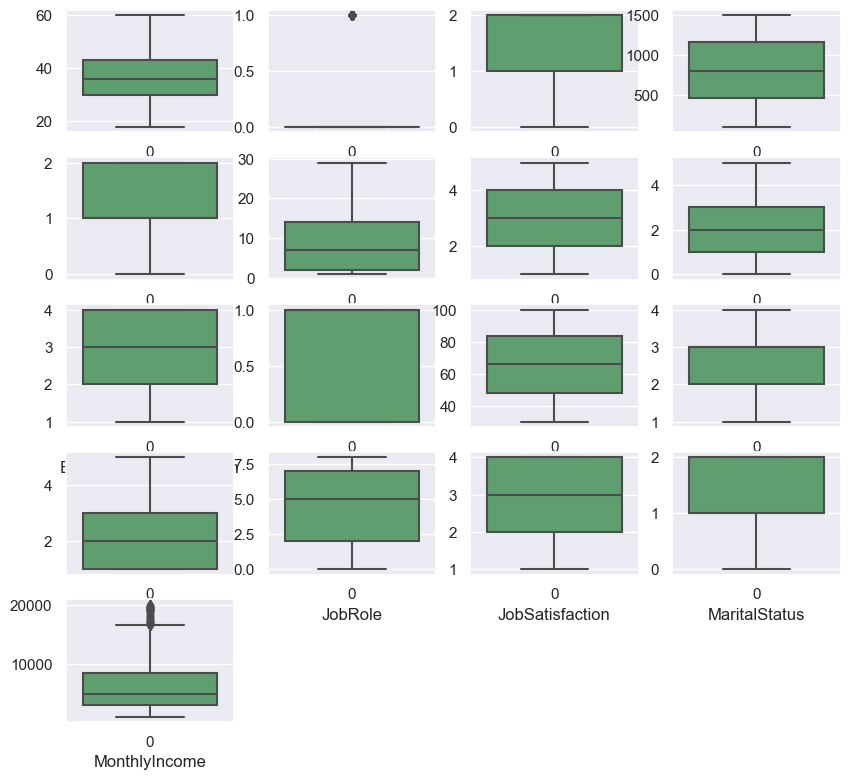

In [136]:
plt.figure(figsize=(10,15), facecolor='white')
pltnum=1
for i in df1.columns:
    if pltnum<18:
        plt.subplot(8,4, pltnum)
        sns.boxplot(df1[i], color='g')
        plt.xlabel(i)
    pltnum+=1
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Input Data in Seperate DataFrame</span>

In [144]:
X

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [137]:
X=df1.drop('Attrition', axis=1)
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,4,2,2,4,1,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,2,3,0,1,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,4,2,4,2,1,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,2,2,7,2,1,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Target Data in Seperate DataFrame</span>

In [138]:
Y=df1['Attrition']
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">Scaling of Data: MINMAX SCALER</span>

In [139]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

<span style="color:green;font-size: 15px;font-family: verdana;font-weight: bold ">SPLITTING TRAINING AND TESTING DATA INTO 70:30 RATIO</span>

In [145]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30, random_state=43)

In [146]:
X_train.shape

(1029, 30)

In [147]:
X_test.shape

(441, 30)

In [148]:
Y_train.shape

(1029,)

In [149]:
Y_test.shape

(441,)

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">FINDING BEST RANDOM STATE</span>

In [152]:
lr = LogisticRegression()


In [153]:
max_acc = 0
max_rs = 0

for i in range(1, 300):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_report = accuracy_score(Y_test, pred)
    
    if acc_report > max_acc:
        max_acc = acc_report
        max_rs = i

    # Print accuracy for each random state
    print("Accuracy Score at Random State", i, "is", acc_report)

# Print the maximum accuracy and corresponding random state
print("Maximum Accuracy Score is", max_acc, "at Random State", max_rs)


Accuracy Score at Random State 1 is 0.8594104308390023
Accuracy Score at Random State 2 is 0.8707482993197279
Accuracy Score at Random State 3 is 0.8752834467120182
Accuracy Score at Random State 4 is 0.8684807256235828
Accuracy Score at Random State 5 is 0.8526077097505669
Accuracy Score at Random State 6 is 0.8684807256235828
Accuracy Score at Random State 7 is 0.8684807256235828
Accuracy Score at Random State 8 is 0.8616780045351474
Accuracy Score at Random State 9 is 0.8707482993197279
Accuracy Score at Random State 10 is 0.8390022675736961
Accuracy Score at Random State 11 is 0.8707482993197279
Accuracy Score at Random State 12 is 0.8752834467120182
Accuracy Score at Random State 13 is 0.8707482993197279
Accuracy Score at Random State 14 is 0.873015873015873
Accuracy Score at Random State 15 is 0.8616780045351474
Accuracy Score at Random State 16 is 0.8684807256235828
Accuracy Score at Random State 17 is 0.8707482993197279
Accuracy Score at Random State 18 is 0.8888888888888888
Ac

Accuracy Score at Random State 148 is 0.8798185941043084
Accuracy Score at Random State 149 is 0.8775510204081632
Accuracy Score at Random State 150 is 0.8276643990929705
Accuracy Score at Random State 151 is 0.8480725623582767
Accuracy Score at Random State 152 is 0.8616780045351474
Accuracy Score at Random State 153 is 0.8866213151927438
Accuracy Score at Random State 154 is 0.8594104308390023
Accuracy Score at Random State 155 is 0.8571428571428571
Accuracy Score at Random State 156 is 0.8684807256235828
Accuracy Score at Random State 157 is 0.8775510204081632
Accuracy Score at Random State 158 is 0.8435374149659864
Accuracy Score at Random State 159 is 0.8820861678004536
Accuracy Score at Random State 160 is 0.8435374149659864
Accuracy Score at Random State 161 is 0.8798185941043084
Accuracy Score at Random State 162 is 0.873015873015873
Accuracy Score at Random State 163 is 0.8866213151927438
Accuracy Score at Random State 164 is 0.8480725623582767
Accuracy Score at Random State 1

Accuracy Score at Random State 296 is 0.8480725623582767
Accuracy Score at Random State 297 is 0.8684807256235828
Accuracy Score at Random State 298 is 0.8503401360544217
Accuracy Score at Random State 299 is 0.8480725623582767
Maximum Accuracy Score is 0.9183673469387755 at Random State 123


<span style="color:MAGENTA;font-size: 22px;font-family: verdana;font-weight: bold ">Maximum Accuracy Score is 0.9183673469387755 at Random State 123</span>


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LOGISTIC REGRESSION</SPAN>


In [154]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=123)

lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.9183673469387755
Confusion Matrix  [[379  31]
 [  5  26]]
Classfication Reports                precision    recall  f1-score   support

           0       0.99      0.92      0.95       410
           1       0.46      0.84      0.59        31

    accuracy                           0.92       441
   macro avg       0.72      0.88      0.77       441
weighted avg       0.95      0.92      0.93       441



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DECESSION TREE CLASSIFIER</SPAN>

In [155]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
pred=dtc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8276643990929705
Confusion Matrix  [[340  32]
 [ 44  25]]
Classfication Reports                precision    recall  f1-score   support

           0       0.89      0.91      0.90       372
           1       0.44      0.36      0.40        69

    accuracy                           0.83       441
   macro avg       0.66      0.64      0.65       441
weighted avg       0.82      0.83      0.82       441



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">K Neighbors Classifier</SPAN>


In [156]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8752834467120182
Confusion Matrix  [[377  48]
 [  7   9]]
Classfication Reports                precision    recall  f1-score   support

           0       0.98      0.89      0.93       425
           1       0.16      0.56      0.25        16

    accuracy                           0.88       441
   macro avg       0.57      0.72      0.59       441
weighted avg       0.95      0.88      0.91       441



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Random Forest Classifier</SPAN>

In [157]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
pred=rfc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8979591836734694
Confusion Matrix  [[380  41]
 [  4  16]]
Classfication Reports                precision    recall  f1-score   support

           0       0.99      0.90      0.94       421
           1       0.28      0.80      0.42        20

    accuracy                           0.90       441
   macro avg       0.64      0.85      0.68       441
weighted avg       0.96      0.90      0.92       441



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Ada Boost Classifier</SPAN>


In [158]:
abc=AdaBoostClassifier()
abc.fit(X_train,Y_train)
pred=abc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.9160997732426304
Confusion Matrix  [[376  29]
 [  8  28]]
Classfication Reports                precision    recall  f1-score   support

           0       0.98      0.93      0.95       405
           1       0.49      0.78      0.60        36

    accuracy                           0.92       441
   macro avg       0.74      0.85      0.78       441
weighted avg       0.94      0.92      0.92       441



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Gradient Boosting Classifier</SPAN>

In [159]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
pred=gbc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8843537414965986
Confusion Matrix  [[372  39]
 [ 12  18]]
Classfication Reports                precision    recall  f1-score   support

           0       0.97      0.91      0.94       411
           1       0.32      0.60      0.41        30

    accuracy                           0.88       441
   macro avg       0.64      0.75      0.67       441
weighted avg       0.92      0.88      0.90       441



<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH LOGISTIC REGRESSION</SPAN>

In [160]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,X ,Y, cv=5)
print("Cross Validation score is", cv_score)
print("Mean of Cross Validation score is", cv_score.mean())
print("Standard Deviation of Cross Validation score is", cv_score.std())

Cross Validation score is [0.88095238 0.86734694 0.86054422 0.8537415  0.86734694]
Mean of Cross Validation score is 0.865986394557823
Standard Deviation of Cross Validation score is 0.009024829361511302


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH DTC</SPAN>

In [161]:
cv_score=cross_val_score(dtc,X ,Y, cv=5)
print("Cross Validation score is", cv_score)
print("Mean of Cross Validation score is", cv_score.mean())
print("Standard Deviation of Cross Validation score is", cv_score.std())

Cross Validation score is [0.78231293 0.7755102  0.80612245 0.7585034  0.80952381]
Mean of Cross Validation score is 0.7863945578231292
Standard Deviation of Cross Validation score is 0.019168711297422293


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH KNEIGHBOUR CLASSIFIER</SPAN>

In [162]:
cv_score=cross_val_score(knn,X ,Y, cv=5)
print("Cross Validation score is", cv_score)
print("Mean of Cross Validation score is", cv_score.mean())
print("Standard Deviation of Cross Validation score is", cv_score.std())

Cross Validation score is [0.85034014 0.84013605 0.84693878 0.84353741 0.8707483 ]
Mean of Cross Validation score is 0.8503401360544217
Standard Deviation of Cross Validation score is 0.010756046463157722


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH RANDOM FOREST CLASSIFIER</SPAN>

In [163]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rfc,X ,Y, cv=5)
print("Cross Validation score is", cv_score)
print("Mean of Cross Validation score is", cv_score.mean())
print("Standard Deviation of Cross Validation score is", cv_score.std())

Cross Validation score is [0.85714286 0.86054422 0.85714286 0.8537415  0.86054422]
Mean of Cross Validation score is 0.8578231292517007
Standard Deviation of Cross Validation score is 0.002545345161070711


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH ADABOOST CLASSIFIER</SPAN>


In [164]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(abc,X ,Y, cv=5)
print("Cross Validation score is", cv_score)
print("Mean of Cross Validation score is", cv_score.mean())
print("Standard Deviation of Cross Validation score is", cv_score.std())

Cross Validation score is [0.85714286 0.87414966 0.84353741 0.87414966 0.9047619 ]
Mean of Cross Validation score is 0.870748299319728
Standard Deviation of Cross Validation score is 0.020521228746936532


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH GRADIENT BOOST CLASSIFIER</SPAN>

In [165]:
cv_score=cross_val_score(gbc,X ,Y, cv=5)
print("Cross Validation score is", cv_score)
print("Mean of Cross Validation score is", cv_score.mean())
print("Standard Deviation of Cross Validation score is", cv_score.std())

Cross Validation score is [0.84353741 0.86054422 0.8707483  0.85034014 0.87414966]
Mean of Cross Validation score is 0.8598639455782312
Standard Deviation of Cross Validation score is 0.01166423687039607


<span style="color:magenta;font-size: 22px;font-family: verdana;font-weight: bold ">Based on the calculated cross-validation results, mean cross-validation scores, and standard deviations, here we have observed that ADABOOST CLASSIFIER has good Cross Validation Score </SPAN>

<span style="color:Blue;font-size: 25px;font-family: verdana;font-weight: bold ">HYPER PARAMETER TUNING</SPAN>


<span style="color:Blue;font-size: 14px;font-family: verdana;font-weight: bold ">GRID SEARCH CV</SPAN>

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoostClassifier
abc = AdaBoostClassifier()

# Define the hyperparameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(abc, param_grid, cv=3, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the model on the test set
test_accuracy = grid_search.score(X_test, Y_test)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'learning_rate': 0.2, 'n_estimators': 150}
Best Accuracy: 0.8542274052478135
Test Accuracy: 0.9070294784580499


<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">FINAL MODEL</SPAN>

In [170]:
abc=AdaBoostClassifier(learning_rate= 0.2, n_estimators= 150)
abc.fit(X_train,Y_train)
pred=abc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.9070294784580499
Confusion Matrix  [[382  39]
 [  2  18]]
Classfication Reports                precision    recall  f1-score   support

           0       0.99      0.91      0.95       421
           1       0.32      0.90      0.47        20

    accuracy                           0.91       441
   macro avg       0.66      0.90      0.71       441
weighted avg       0.96      0.91      0.93       441



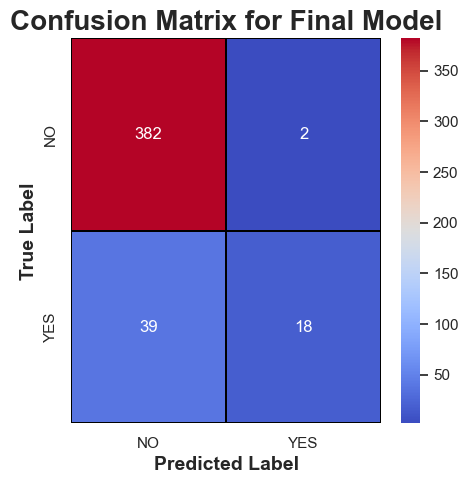

In [171]:
Matrix = confusion_matrix(Y_test, pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="coolwarm", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

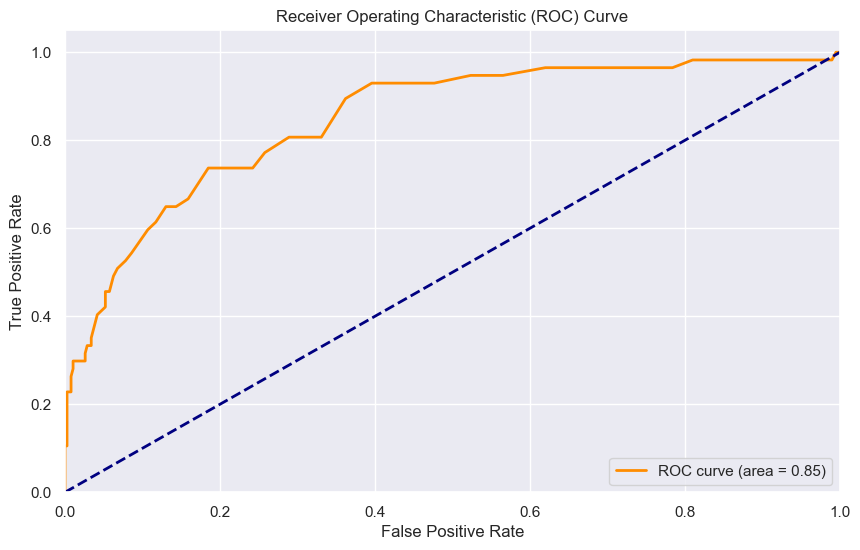

In [172]:
from sklearn.metrics import roc_curve, auc

# Assuming you have true labels (y_true) and predicted probabilities (y_probs) from your model
y_probs = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">SAVING-FINAL MODEL</SPAN>

In [173]:
import joblib
joblib.dump(abc,'HR_analytics.pkl')

['HR_analytics.pkl']

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">PREDICTION</SPAN>

In [174]:
prediction = abc.predict(X_test)


In [177]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head(5)

,Predicted Values,Actual Values
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [178]:
df_Pred.tail(5)

,Predicted Values,Actual Values
436,0,0
437,0,0
438,1,1
439,0,0
440,0,0
